In [1]:
print('hello sonam')

hello sonam


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
t_datafile="C:\\Users\\Shivansh Singh\\Desktop\\New Folder\\training.1600000.processed.noemoticon.csv"

In [4]:
tdf=pd.read_csv(t_datafile, encoding='latin1')

In [5]:
print("First few rows of the dataset:")
print(tdf.head())

First few rows of the dataset:
   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not

In [5]:
tdf.columns=['Target', 'ID', 'Date', 'Flag', 'User', 'Text']
print("First few rows of the dataset:")
print(tdf.head())

First few rows of the dataset:
   Target          ID                          Date      Flag           User  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                Text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   


In [8]:
print("Information about the dataset:")
print(tdf.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1599999 non-null  int64 
 1   ID      1599999 non-null  int64 
 2   Date    1599999 non-null  object
 3   Flag    1599999 non-null  object
 4   User    1599999 non-null  object
 5   Text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [9]:
print('Summary Statistics:')
print(tdf.describe())

Summary Statistics:
             Target            ID
count  1.599999e+06  1.599999e+06
mean   2.000001e+00  1.998818e+09
std    2.000001e+00  1.935757e+08
min    0.000000e+00  1.467811e+09
25%    0.000000e+00  1.956916e+09
50%    4.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09


In [10]:
print("Unique values in Target column:")
print(tdf['Target'].value_counts())

Unique values in Target column:
Target
4    800000
0    799999
Name: count, dtype: int64


In [11]:
#Check for any missing values
print("Missing value in each column:")
print(tdf.isnull().sum())

Missing value in each column:
Target    0
ID        0
Date      0
Flag      0
User      0
Text      0
dtype: int64


In [6]:
df_cleaned=tdf.drop(columns=['ID', 'Flag', 'User'])

In [7]:
df_cleaned=df_cleaned.drop_duplicates()

In [8]:
df_cleaned=df_cleaned.dropna()

In [9]:
import re
def clean_text(Text):
    text=re.sub(r"http\S+", "", Text)
    text=re.sub(r"\W", " ", Text)
    text=re.sub(r"\d+", "", Text)
    return text.lower()
df_cleaned['Text']=df_cleaned['Text'].apply(clean_text)
print(df_cleaned.head())

   Target                          Date  \
0       0  Mon Apr 06 22:19:49 PDT 2009   
1       0  Mon Apr 06 22:19:53 PDT 2009   
2       0  Mon Apr 06 22:19:57 PDT 2009   
3       0  Mon Apr 06 22:19:57 PDT 2009   
4       0  Mon Apr 06 22:20:00 PDT 2009   

                                                Text  
0  is upset that he can't update his facebook by ...  
1  @kenichan i dived many times for the ball. man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @kwesidei not the whole crew   


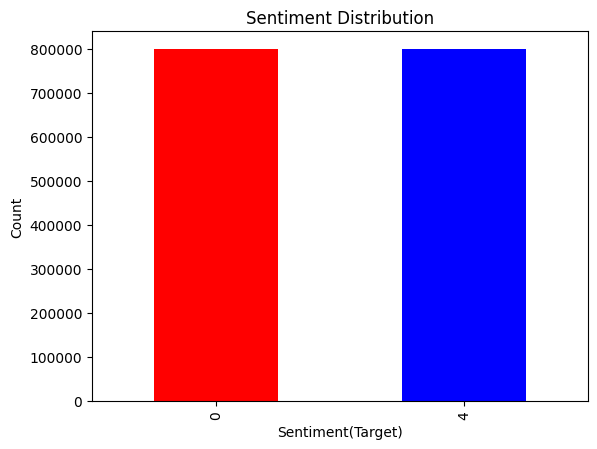

In [11]:
df_cleaned['Target'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment(Target)')
plt.ylabel('Count')
plt.show()

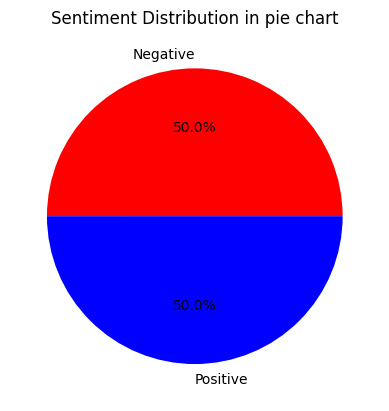

In [13]:
sentiment_counts=df_cleaned['Target'].value_counts()
plt.pie(sentiment_counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', colors=['red', 'blue'])
plt.title('Sentiment Distribution in pie chart')
plt.show()

In [14]:
from collections import Counter

In [15]:
from nltk.corpus import stopwords

In [16]:
import nltk

In [17]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [18]:
stop_words=set(stopwords.words('engish'))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Shivansh Singh/nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [40]:
tdf.dropna(inplace=True)
tdf.drop_duplicates(inplace=True)
print(tdf.info())
print(tdf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1599999 non-null  int64 
 1   ID      1599999 non-null  int64 
 2   Date    1599999 non-null  object
 3   Flag    1599999 non-null  object
 4   User    1599999 non-null  object
 5   Text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None
   Target          ID                          Date      Flag           User  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                               

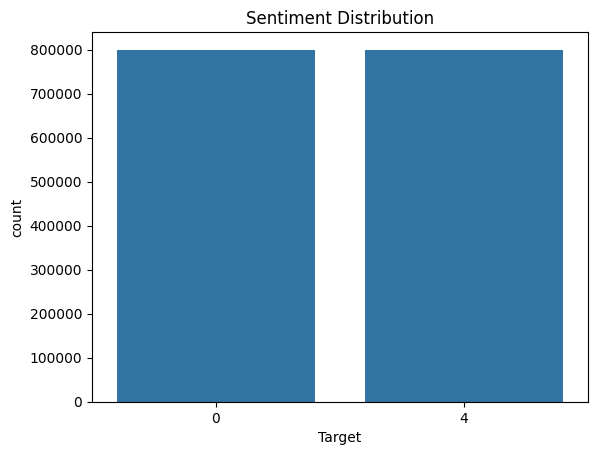

In [41]:
sns.countplot(data=tdf, x='Target')
plt.title('Sentiment Distribution')
plt.show()

In [42]:
class_counts=tdf['Target'].value_counts()
print("Class balance: \n",class_counts)

Class balance: 
 Target
4    800000
0    799999
Name: count, dtype: int64


In [12]:
from collections import Counter
import nltk
from ltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

ModuleNotFoundError: No module named 'ltk.corpus'

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
from flask import Flask, render_template, request 

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(df['clean_text'

In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install ltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 1.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.8 MB 1.7 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/1.8 MB 901.1 kB/s eta 0:00:02
   --- ------------------------------------ 0.2/1.8 MB 1.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.8 MB 958.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.3/1.8 MB 1.0 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 1.0 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.8 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.8 MB 997.7 kB/s eta 0:00:02
   ---------- ----------------------------- 0.5/1.8 MB 994.6 kB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.8 MB 1.0 MB/s eta 0:00:02
   ------------ --------------------------- 0.6/1.8 MB 974.4 kB/s eta 0:00:02
   ------

In [6]:
from wordcloud import WordCloud

In [ ]:
text = " ".join(tweet for tweet in tdf['Text'])
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Tweets')
plt.show()

In [7]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Shivansh Singh/nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [9]:
common_words=Counter(word_freq_dict).most_common(10)
print("Top 10 common words:\n", common_words)

NameError: name 'word_freq_dict' is not defined

In [10]:
words=[word for word, freq in common_words]
freqs=[freq for word, freq in common_words]

NameError: name 'common_words' is not defined

In [13]:
tdf['date']=pd.to_datetime(tdf['Date'])

C:\Users\Shivansh Singh\AppData\Local\Temp\ipykernel_7820\4060565113.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:49 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  tdf['date']=pd.to_datetime(tdf['Date'])


In [14]:
tdf.resample('M')['Target'].mean().plot(kind='line')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()

C:\Users\Shivansh Singh\AppData\Local\Temp\ipykernel_7820\4289979405.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tdf.resample('M')['Target'].mean().plot(kind='line')


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [15]:
import re

In [16]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [17]:
tdf['clean_text']=tdf['Text'].apply(lambda x:re.sub(r'http\S+|https\S+|[^a-zA-Z]', '', str(x)))

In [18]:
tdf['clean_text']=tdf['Text'].apply(word_tokenize)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Shivansh Singh/nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [19]:
lemmatizer=WordNetLemmatizer()
tdf['clean_text']=tdf['Text'].apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\Shivansh Singh/nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Shivansh Singh\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [20]:
import sklearn

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [11]:
x=df_cleaned['Text']
y=df_cleaned['Target']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
model=LogisticRegression()
model.fit(x_train, y_train)

ValueError: could not convert string to float: "does anyone know if http://blogger.com is down? it won't let me post  #fail http://myloc.me/ic"

In [16]:
df_cleaned['Date']=pd.to_datetime(df_cleaned['Date'], errors='coerce')

In [17]:
df_cleaned.set_index('Date', inplace=True)

C:\Users\Shivansh Singh\AppData\Local\Temp\ipykernel_8460\82652955.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_cleaned.resample('A').size().plot()
C:\Users\Shivansh Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: xlabel='Date'>

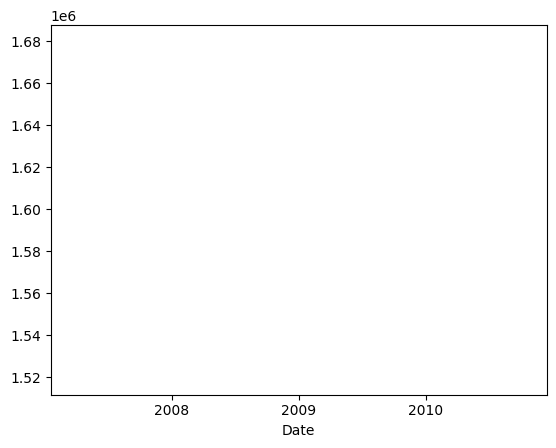

In [20]:
df_cleaned.resample('A').size().plot()

In [21]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [13]:
import numpy as np

In [14]:
feature_imp=np.abs(model.coef_[0])

AttributeError: 'LogisticRegression' object has no attribute 'coef_'